In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_df=pd.read_csv('D:/Mahadi_Nazmul_project/feature.csv', index_col=None)
feature_df.head()

,id_student,highest_education,final_result,1752,1753,1754,1755,1756,1757,S1752,...,S1754,S1755,S1756,S1757,TSC,TDC,excellent,qualified,AS,EwC
0,11391,HE Qualification,Pass,1.0,1.0,1.0,1.0,1.0,0.0,78.0,...,80.0,85.0,82.0,0.0,934.0,196.0,1.0,1.0,0.0,1.0
1,28400,HE Qualification,Pass,1.0,1.0,1.0,1.0,1.0,0.0,70.0,...,70.0,64.0,60.0,0.0,1435.0,430.0,1.0,1.0,0.0,1.0
2,30268,A Level or Equivalent,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,281.0,76.0,0.0,0.0,0.0,0.0
3,31604,A Level or Equivalent,Pass,1.0,1.0,1.0,1.0,1.0,0.0,72.0,...,74.0,88.0,75.0,0.0,2158.0,663.0,1.0,1.0,1.0,1.0
4,32885,Lower Than A Level,Pass,1.0,1.0,1.0,1.0,1.0,0.0,69.0,...,63.0,35.0,75.0,0.0,1034.0,352.0,0.0,1.0,0.0,0.0


In [3]:
feature_df = feature_df.drop(labels='highest_education', axis=1, level=None, inplace=False)
feature_df = feature_df.drop(labels='id_student', axis=1, level=None, inplace=False)
feature_df.head()

,final_result,1752,1753,1754,1755,1756,1757,S1752,S1753,S1754,S1755,S1756,S1757,TSC,TDC,excellent,qualified,AS,EwC
0,Pass,1.0,1.0,1.0,1.0,1.0,0.0,78.0,85.0,80.0,85.0,82.0,0.0,934.0,196.0,1.0,1.0,0.0,1.0
1,Pass,1.0,1.0,1.0,1.0,1.0,0.0,70.0,68.0,70.0,64.0,60.0,0.0,1435.0,430.0,1.0,1.0,0.0,1.0
2,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,76.0,0.0,0.0,0.0,0.0
3,Pass,1.0,1.0,1.0,1.0,1.0,0.0,72.0,71.0,74.0,88.0,75.0,0.0,2158.0,663.0,1.0,1.0,1.0,1.0
4,Pass,1.0,1.0,1.0,1.0,1.0,0.0,69.0,30.0,63.0,35.0,75.0,0.0,1034.0,352.0,0.0,1.0,0.0,0.0


# label encoder string to numeric 'final_result'

In [4]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(feature_df.final_result)
feature_df.final_result= encoder.transform(feature_df.final_result)

In [5]:
feature_df.head()

,final_result,1752,1753,1754,1755,1756,1757,S1752,S1753,S1754,S1755,S1756,S1757,TSC,TDC,excellent,qualified,AS,EwC
0,2,1.0,1.0,1.0,1.0,1.0,0.0,78.0,85.0,80.0,85.0,82.0,0.0,934.0,196.0,1.0,1.0,0.0,1.0
1,2,1.0,1.0,1.0,1.0,1.0,0.0,70.0,68.0,70.0,64.0,60.0,0.0,1435.0,430.0,1.0,1.0,0.0,1.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,76.0,0.0,0.0,0.0,0.0
3,2,1.0,1.0,1.0,1.0,1.0,0.0,72.0,71.0,74.0,88.0,75.0,0.0,2158.0,663.0,1.0,1.0,1.0,1.0
4,2,1.0,1.0,1.0,1.0,1.0,0.0,69.0,30.0,63.0,35.0,75.0,0.0,1034.0,352.0,0.0,1.0,0.0,0.0


In [6]:
# feature_df = feature_df.apply(pd.to_numeric)

In [7]:
#Total Number of Continous and Categorical features in the training set
num_cols = feature_df._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 19


# input matrix X

In [8]:
X = feature_df.iloc[:,0:18]
X = np.array(X).astype(np.float64)
print(X)

[[2. 1. 1. ... 1. 1. 0.]
 [2. 1. 1. ... 1. 1. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 1. ... 0. 1. 0.]
 [2. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 0.]]


# output matrix y

In [9]:
y= feature_df.iloc[:,18:19]
y= y.unstack()
y= np.array(y).astype(int)
print(y)

[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1]


# train and test data splitted 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# knn model: classification report , confusion matrix and ROC-AUC curve

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)
print('Test set score for Knn: %f' % knn.score(X_test, y_test ))
print('Accuracy score for Knn: %f' % accuracy_score(y_test, y_pred_knn))

Test set score for Knn: 0.812500
Accuracy score for Knn: 0.812500


In [12]:
class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_knn, target_names=class_names))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

     class 0       0.71      0.56      0.63        27
     class 1       0.84      0.91      0.87        69

   micro avg       0.81      0.81      0.81        96
   macro avg       0.78      0.73      0.75        96
weighted avg       0.80      0.81      0.80        96

Confusion matrix: 
 [[15 12]
 [ 6 63]]


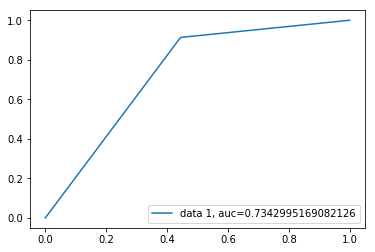

In [13]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# svm model: classification report , confusion matrix and ROC-AUC curve

In [14]:
clf= svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm= clf.predict(X_test)
print('Test set score for svm: %f' % clf.score(X_test, y_test))
print('Accuracy score for svm: %f' % accuracy_score(y_test, y_pred_svm))

class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_svm, target_names=class_names))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_svm))

Test set score for svm: 0.718750
Accuracy score for svm: 0.718750
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        27
     class 1       0.72      1.00      0.84        69

   micro avg       0.72      0.72      0.72        96
   macro avg       0.36      0.50      0.42        96
weighted avg       0.52      0.72      0.60        96

Confusion matrix: 
 [[ 0 27]
 [ 0 69]]


c:\users\moin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\moin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


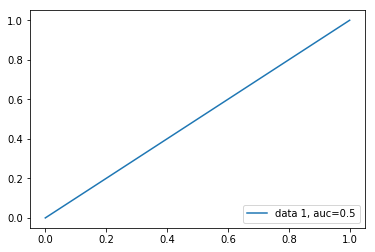

In [15]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_svm)
auc = metrics.roc_auc_score(y_test, y_pred_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree model: classification report , confusion matrix and ROC-AUC curve

In [16]:
dt=  DecisionTreeClassifier()
dt.fit(X_train, y_train) 
y_pred_dt = dt.predict(X_test)
print('Test set score for dt: %f' % dt.score(X_test, y_test))
print('Accuracy score for dt: %f' % accuracy_score(y_test, y_pred_dt))

class_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt, target_names=class_names))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_dt))

Test set score for dt: 1.000000
Accuracy score for dt: 1.000000
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        27
     class 1       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

Confusion matrix: 
 [[27  0]
 [ 0 69]]


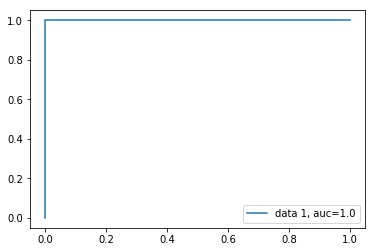

In [17]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dt)
auc = metrics.roc_auc_score(y_test, y_pred_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Parameter tuning for svm, finding best parameter to train the model

In [18]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [19]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

c:\users\moin\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)

Best score for training data: 0.9965156794425087 

Best C: 1 

Best Kernel: linear 

Best Gamma: auto_deprecated 



In [21]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test, y_test ))

svm_model.score

[[27  0]
 [ 0 69]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

Training set score for SVM: 1.000000
Testing  set score for SVM: 1.000000


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>